# Exercise 2b: Arithmetic and Aggregation

## Aim: Learn to do computation with xarray

Find the teaching materials here: https://tutorial.xarray.dev/fundamentals/03.1_computation_with_xarray.html

### Issues covered: 
- Doing arithmetic on data arrays
- Using `.mean()`, `.std()`, `.max()` and `.min()`

Q1. Import the `'../data/xbhubo.pgc0apr.nc'` dataset and create the temperature data array as in the last lesson.

In [1]:
import xarray as xr
ds= xr.open_dataset("../data/xbhubo.pgc0apr.nc")
temp=ds['temp']

Q2. Let's compare the data between the sea surface and further down. Create two temperature datasets and extract the temperature change data the sea surface and the sea bottom

In [9]:
temp1

<xarray.DataArray 'temp' (latitude: 144, longitude: 288)> Size: 166kB
[41472 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 1kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * latitude   (latitude) float32 576B -89.38 -88.12 -86.88 ... 88.12 89.38
    depth      float32 4B 5.0
    t          object 8B 1920-04-16 00:00:00
Attributes:
    source:     Unified Model Output:
    name:       temp
    title:      POTENTIAL TEMPERATURE (OCEAN)  DEG.C
    date:       01/12/99
    time:       00:00
    long_name:  POTENTIAL TEMPERATURE (OCEAN)  DEG.C
    units:      degC
    valid_min:  -1.7999878
    valid_max:  35.0495

In [10]:
temp1=temp.isel(depth=0).squeeze()
temp2=temp.isel(depth=5).squeeze()
temp_change= temp1-temp2

Q3. Calculate the difference in temperature the bottom of the ocean and the surface.

In [11]:
temp_change

<xarray.DataArray 'temp' (latitude: 144, longitude: 288)> Size: 166kB
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-0.2428894 , -0.24490356, -0.24713135, ..., -0.2387085 ,
        -0.23983765, -0.24118042],
       [-0.3053589 , -0.31079102, -0.31539917, ..., -0.2874756 ,
        -0.29330444, -0.29937744],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 1kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * latitude   (latitude) float32 576B -89.38 -88.12 -86.88 ... 88.12 89.38
    t          object 8B 1920-04-16 00:00:00

Q4. Plot the difference in these temperatures using xarrays built-in features.

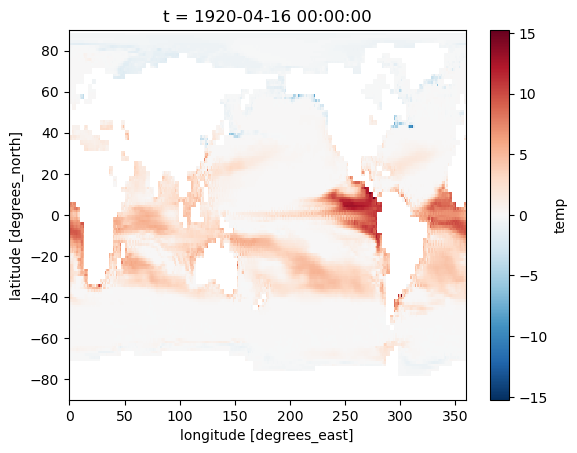

In [12]:
temp_change.plot()

Q5. Calculate the **minimum** temperature across the water depth in all locations.

In [14]:
temp_min=temp.min(dim='depth')

Q6. Compute the global average ocean temperature change (averaged over all depths) for the entire time period in the dataset. Then display the result as a 2D depth profile.

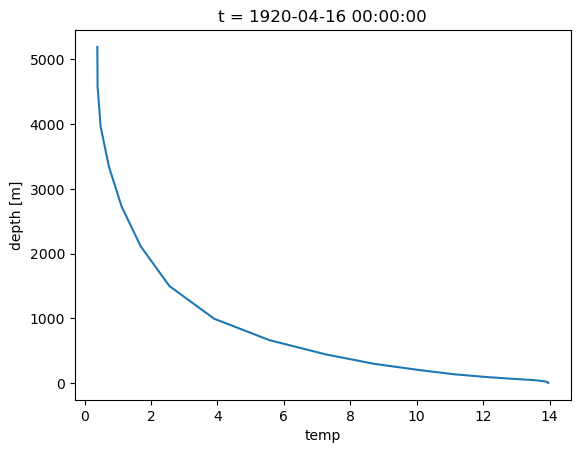

In [24]:
temp_avg=temp.mean(['longitude','latitude'])
temp_avg.plot(y='depth')


Q7. Calculate the zonal average temperature change for each latitude. Plot the result as a 2d contour with depth on the y axis and latitude on x.

In [19]:
temp_zonal=temp.mean(['longitude','t'])

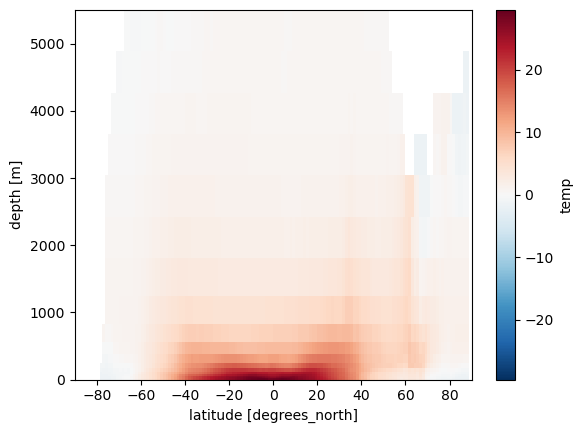

In [20]:
temp_zonal.plot()
